# Advanced Optimization of the Model

In [1]:
import phoebe 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

logger = phoebe.logger(clevel = 'WARNING')

In [2]:
b = phoebe.open('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/bundles/after_fast_nm.bundle')

# Update Physics 

In [3]:
b.add_compute(compute = 'physics_comp')

<ParameterSet: 46 parameters | datasets: _default, rv01, lc01>

In [20]:
b.set_value_all('ld_mode', value = 'interp')
b.set_value_all('atm', value = 'ck2004')
b.set_value('irrad_method', compute = 'physics_comp', value = 'horvat')
b.set_value_all('rv_method', compute = 'physics_comp', value = 'flux-weighted')
b.set_value_all('distortion_method', compute = 'physics_comp', value = 'roche')

In [21]:
b['ntriangles@primary@physics_comp'] = 2000

### Fitting with Nelder Mead optimizer

In [23]:
b.add_solver('optimizer.nelder_mead', solver = 'nm_physics', compute = 'physics_comp')

<ParameterSet: 14 parameters | qualifiers: continue_from, initial_values, compute, expose_lnprobabilities, fatol, priors, use_server, maxiter, adaptive, xatol, fit_parameters, progress_every_niters, priors_combine, comments>

In [24]:
b.set_value('maxiter@nm_physics', value = 100)

### Fitting the light curve only

In [26]:
b.disable_dataset('rv01')

<ParameterSet: 20 parameters | components: primary, binary, secondary>

In [27]:
fit_params = ['teffratio@binary', 'requivsumfrac@binary', 'requivratio@binary']
b.set_value('fit_parameters@nm_physics', fit_params)

In [28]:
b.run_solver('nm_physics', compute = 'physics_comp', solution = 'nm_phys_lc_sol')

100%|██████████| 100/100 [45:50<00:00, 27.50s/it] 


<ParameterSet: 11 parameters | qualifiers: adopt_distributions, initial_values, comments, success, fitted_values, niter, adopt_values, adopt_parameters, message, fitted_units, fitted_twigs>

In [29]:
print(b.adopt_solution('nm_phys_lc_sol', trial_run = True))

ParameterSet: 3 parameters
   teffratio@binary@orbit@comp...: 0.8305440646745308
   requivsumfrac@binary@orbit@...: 0.16426775169683577
   requivratio@binary@orbit@co...: 1.0436187456983392


In [30]:
b.adopt_solution('nm_phys_lc_sol')

<ParameterSet: 8 parameters | kinds: orbit, star>

In [31]:
b.run_compute(compute = 'physics_comp', solution = 'nm_phys_lc_sol', sample_num = 1, model = 'nm_lc_model', overwrite = True)

Sat, 27 Jul 2024 18:22 BUNDLE       WARNING applying passed solution (nm_phys_lc_sol) to sample_from
Sat, 27 Jul 2024 18:22 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [00:59<00:00, 59.08s/it]


<ParameterSet: 9 parameters | qualifiers: sampled_uniqueids, flux_scale, failed_samples, samples, sample_mode, fluxes, sampled_twigs, comments, times>

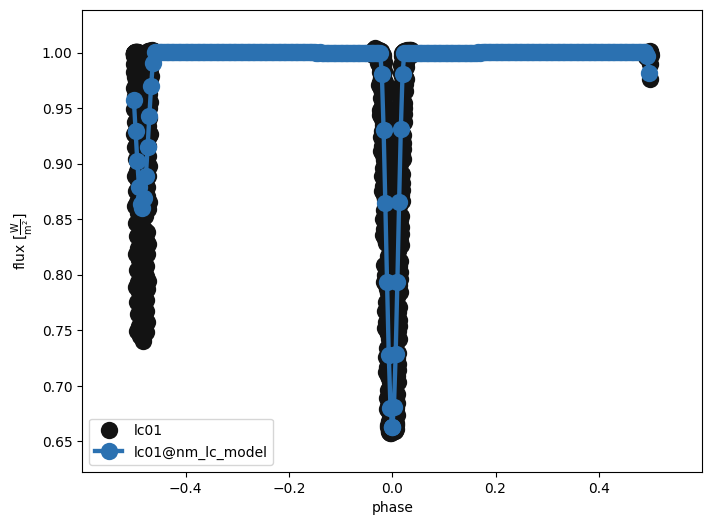

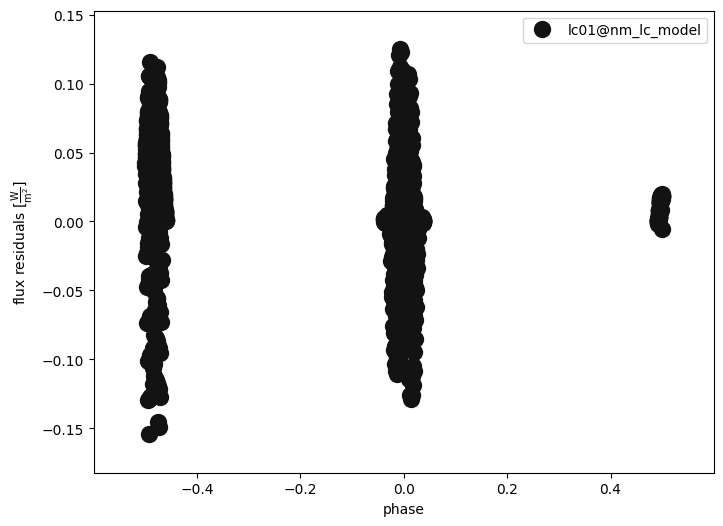

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [32]:
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o')
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', y = 'residuals', show = True, legend = True, marker = 'o')

In [37]:
fit_params = ['teffratio@binary', 'incl@binary']
b.set_value('fit_parameters@nm_physics', fit_params)

In [38]:
b.set_value('compute_phases@lc01', value = phoebe.linspace(0, 1, 1001))

In [39]:
b.run_solver('nm_physics', compute = 'physics_comp', solution = 'nm_phys_lc_sol', overwrite = True)

100%|██████████| 100/100 [2:02:43<00:00, 73.63s/it]  


<ParameterSet: 11 parameters | qualifiers: adopt_distributions, initial_values, comments, success, fitted_values, niter, adopt_values, adopt_parameters, message, fitted_units, fitted_twigs>

In [40]:
print(b.adopt_solution('nm_phys_lc_sol', trial_run = True))

ParameterSet: 2 parameters
   teffratio@binary@orbit@comp...: 0.8305614635129406
      incl@binary@orbit@component: 85.73435900716616 deg


In [41]:
b.adopt_solution('nm_phys_lc_sol')

<ParameterSet: 18 parameters | kinds: orbit, star>

In [42]:
b.run_compute(compute = 'physics_comp', solution = 'nm_phys_lc_sol', sample_num = 1, model = 'nm_lc_model', overwrite = True)

Sat, 27 Jul 2024 20:50 BUNDLE       WARNING applying passed solution (nm_phys_lc_sol) to sample_from
Sat, 27 Jul 2024 20:50 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [02:34<00:00, 154.33s/it]


<ParameterSet: 9 parameters | qualifiers: sampled_uniqueids, flux_scale, failed_samples, samples, sample_mode, fluxes, sampled_twigs, comments, times>

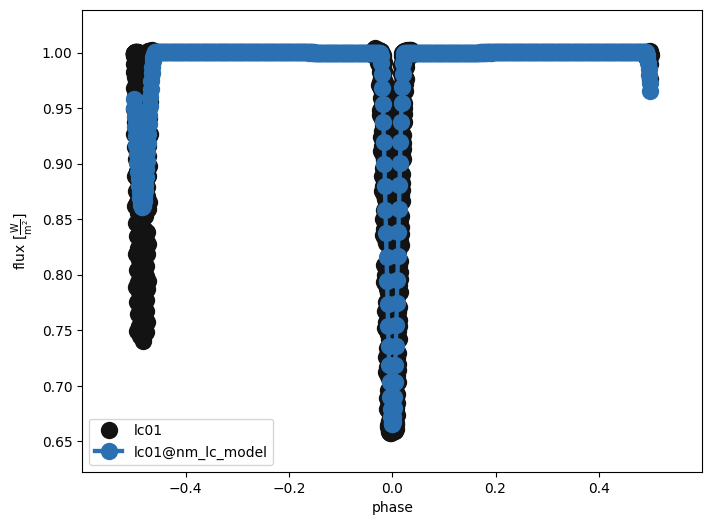

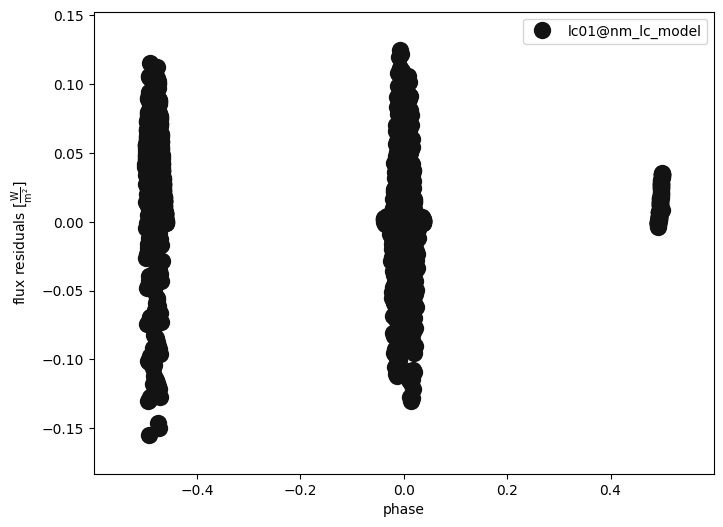

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [43]:
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o')
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', y = 'residuals', show = True, legend = True, marker = 'o')

In [48]:
b.save('during_nm_phys.bundle')

'during_nm_phys.bundle'

### Fitting both LC and RV 

In [2]:
b = phoebe.open('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/bundles/during_nm_phys.bundle')

In [3]:
b.enable_dataset('rv01')

<ParameterSet: 20 parameters | components: secondary, binary, primary>

In [4]:
fit_params = ['vgamma@system', 'q@binary', 'asini@binary', 'ecc@binary', 'per0@binary', 
              'teffratio@binary', 'requivsumfrac@binary', 'requivratio@binary']
b.set_value('fit_parameters@nm_physics', fit_params)

In [5]:
b.run_solver('nm_physics', solution = 'nm_phys_sol')

Mon, 29 Jul 2024 14:38 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases
100%|██████████| 100/100 [1:07:19<00:00, 40.39s/it]


<ParameterSet: 11 parameters | qualifiers: message, fitted_units, comments, adopt_parameters, adopt_values, niter, success, fitted_twigs, adopt_distributions, fitted_values, initial_values>

In [6]:
print(b.adopt_solution('nm_phys_sol', trial_run = True))

ParameterSet: 8 parameters
                    vgamma@system: 37.56796501474197 km / s
         q@binary@orbit@component: 1.1620491400608302
     asini@binary@orbit@component: 22.870584733606194 solRad
       ecc@binary@orbit@component: 0.0328472142123296
      per0@binary@orbit@component: 40.46994761124357 deg
   teffratio@binary@orbit@comp...: 0.8224024642945922
   requivsumfrac@binary@orbit@...: 0.16667437541956853
   requivratio@binary@orbit@co...: 0.9791002652430669


In [7]:
b.adopt_solution('nm_phys_sol')

<ParameterSet: 29 parameters | contexts: dataset, system, component>

In [8]:
b.run_compute(compute = 'physics_comp', solution = 'nm_phys_sol', sample_num = 1, model = 'nm_phys_model')

Mon, 29 Jul 2024 15:45 BUNDLE       WARNING applying passed solution (nm_phys_sol) to sample_from
Mon, 29 Jul 2024 15:45 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [02:50<00:00, 170.72s/it]


<ParameterSet: 13 parameters | kinds: rv, lc>

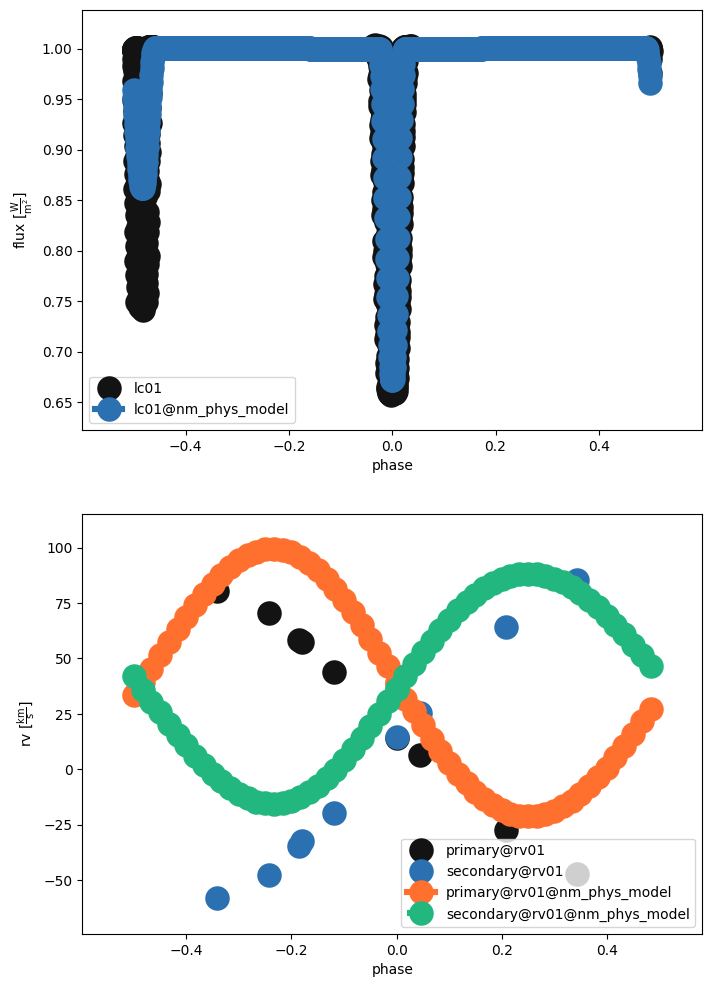

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [9]:
b.plot(model = 'nm_phys_model', x = 'phases', show = True, legend = True, marker = 'o')

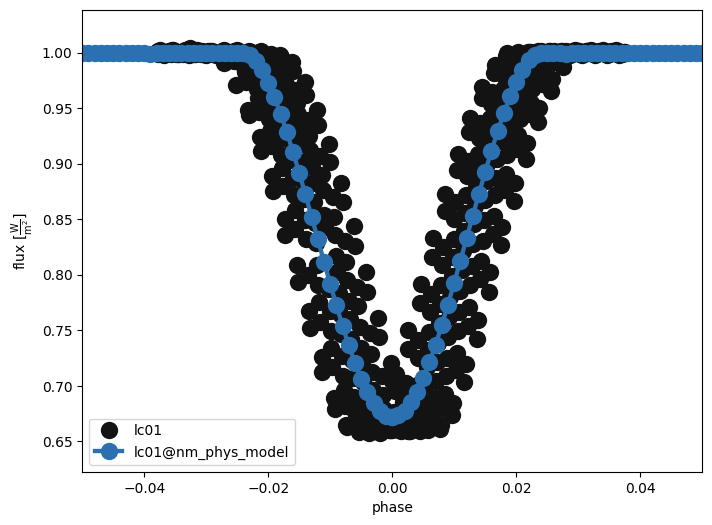

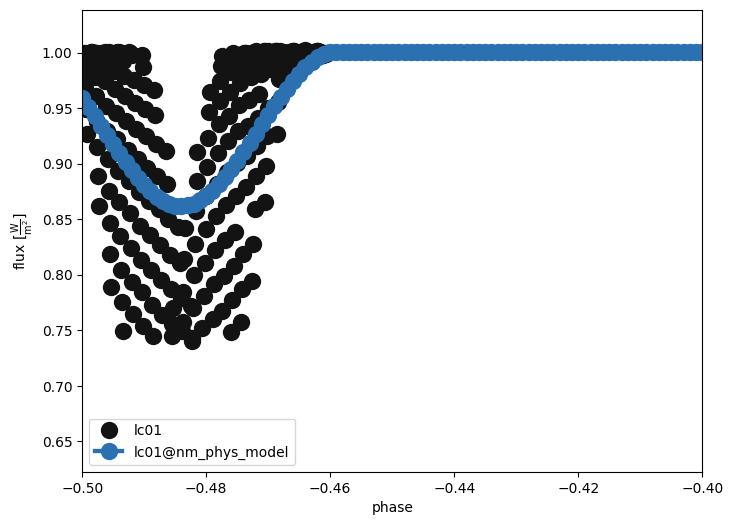

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [10]:
b.plot(model = 'nm_phys_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o', xlim = (-0.05, 0.05))
b.plot(model = 'nm_phys_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o', xlim = (-0.5, -0.4))

In [11]:
b.save('during_nm_phys.bundle')

'during_nm_phys.bundle'

In [12]:
b = phoebe.open('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/bundles/during_nm_phys.bundle')

In [14]:
fit_params = ['teffratio@binary', 'requivratio@binary']
b.set_value('fit_parameters@nm_physics', fit_params)

In [15]:
b.run_solver('nm_physics', solution = 'nm_phys_sol', overwrite = True)

 90%|█████████ | 90/100 [1:37:21<10:49, 64.91s/it]  


<ParameterSet: 11 parameters | qualifiers: message, fitted_units, comments, adopt_parameters, adopt_values, niter, success, fitted_twigs, adopt_distributions, fitted_values, initial_values>

In [16]:
print(b.adopt_solution('nm_phys_sol', trial_run = True))

ParameterSet: 2 parameters
   teffratio@binary@orbit@comp...: 0.8241614331702541
   requivratio@binary@orbit@co...: 1.0000508429795447


In [19]:
b.adopt_solution('nm_phys_sol')

<ParameterSet: 7 parameters | kinds: star, orbit>

In [20]:
b.run_compute(compute = 'physics_comp', solution = 'nm_phys_sol', sample_num = 1, model = 'nm_phys_model', overwrite = True)

Mon, 29 Jul 2024 17:39 BUNDLE       WARNING applying passed solution (nm_phys_sol) to sample_from
Mon, 29 Jul 2024 17:39 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [02:48<00:00, 168.85s/it]


<ParameterSet: 13 parameters | kinds: rv, lc>

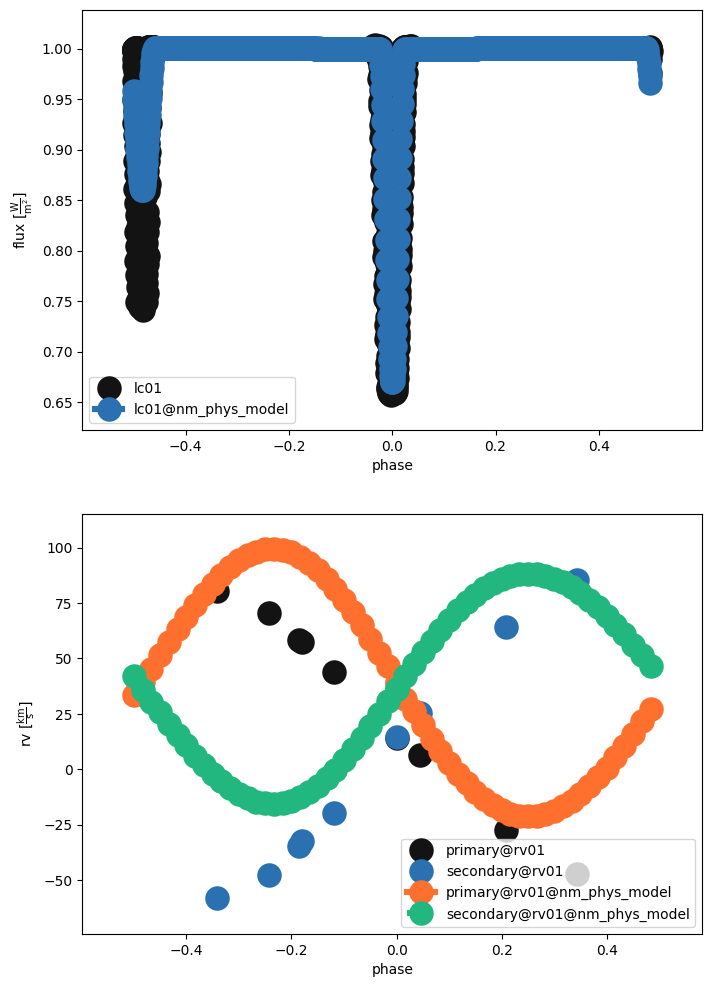

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [21]:
b.plot(model = 'nm_phys_model', x = 'phases', show = True, legend = True, marker = 'o')

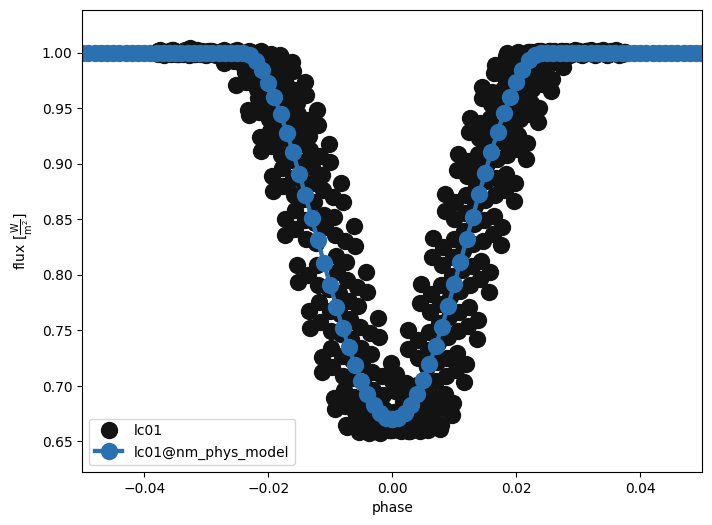

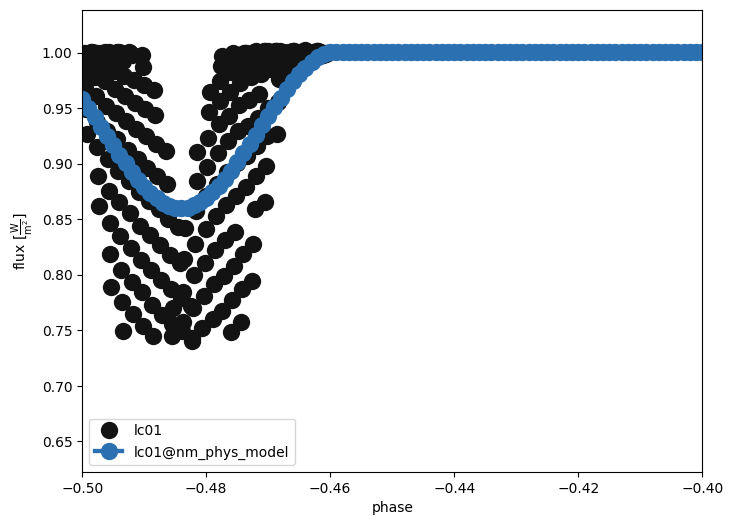

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [22]:
b.plot(model = 'nm_phys_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o', xlim = (-0.05, 0.05))
b.plot(model = 'nm_phys_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o', xlim = (-0.5, -0.4))

In [23]:
b.save('during_nm_phys.bundle')

'during_nm_phys.bundle'

In [24]:
b = phoebe.open('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/bundles/during_nm_phys.bundle')

In [26]:
fit_params = ['ecc@binary', 'per0@binary', 'incl@binary']
b.set_value('fit_parameters@nm_physics', fit_params)

In [27]:
b.run_solver('nm_physics', solution = 'nm_phys_sol', overwrite = True)

Mon, 29 Jul 2024 17:45 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases
100%|██████████| 100/100 [1:18:54<00:00, 47.34s/it]


<ParameterSet: 11 parameters | qualifiers: message, fitted_units, comments, adopt_parameters, adopt_values, niter, success, fitted_twigs, adopt_distributions, fitted_values, initial_values>

In [28]:
print(b.adopt_solution('nm_phys_sol', trial_run = True))

ParameterSet: 3 parameters
       ecc@binary@orbit@component: 0.04519728757676818
      per0@binary@orbit@component: 304.046878766585 deg
      incl@binary@orbit@component: 85.87143082469257 deg


In [29]:
b.adopt_solution('nm_phys_sol')

<ParameterSet: 25 parameters | contexts: dataset, component>

In [30]:
b.run_compute(compute = 'physics_comp', solution = 'nm_phys_sol', sample_num = 1, model = 'nm_phys_model', overwrite = True)

Mon, 29 Jul 2024 19:07 BUNDLE       WARNING applying passed solution (nm_phys_sol) to sample_from
Mon, 29 Jul 2024 19:07 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [02:33<00:00, 153.27s/it]


<ParameterSet: 13 parameters | kinds: rv, lc>

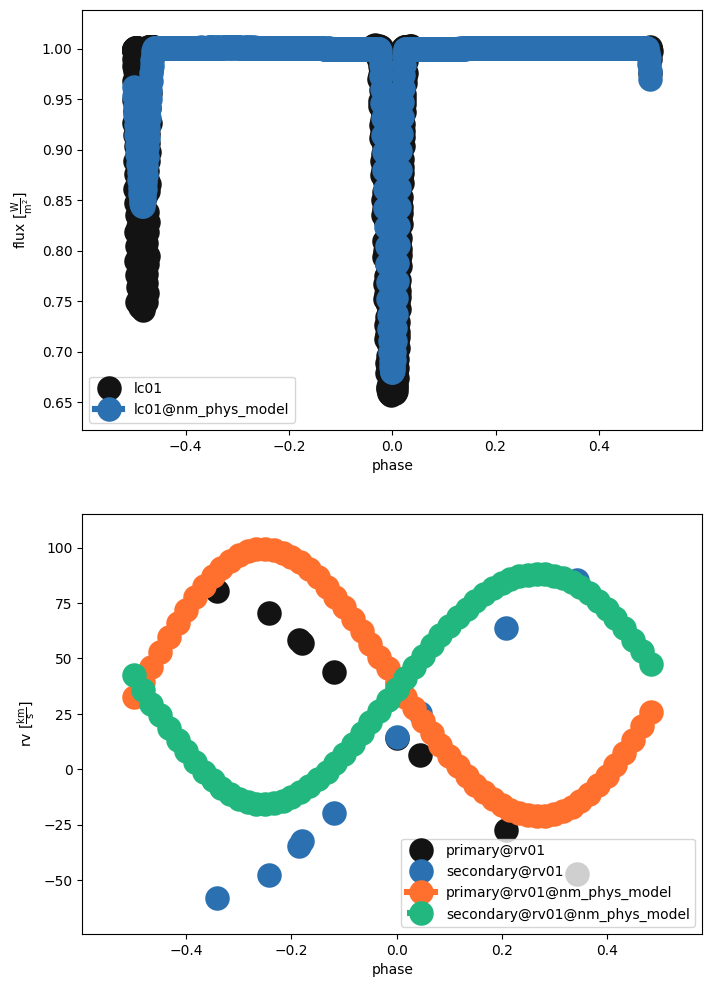

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [31]:
b.plot(model = 'nm_phys_model', x = 'phases', show = True, legend = True, marker = 'o')

In [32]:
b.save('during_nm_phys.bundle')

'during_nm_phys.bundle'

In [2]:
b = phoebe.open('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/bundles/during_nm_phys.bundle')

In [3]:
fit_params = ['ecc@binary', 'per0@binary']
b.set_value('fit_parameters@nm_physics', fit_params)

In [4]:
b.set_value('maxiter@nm_physics', value = 300)

In [6]:
b.run_solver('nm_physics', solution = 'nm_phys_sol', overwrite = True)

Tue, 30 Jul 2024 10:37 BUNDLE       WARNING fit_parameters contains a parameter (['per0']) that affects phasing which could cause issues with mask_phases
100%|██████████| 300/300 [7:32:13<00:00, 90.45s/it]   


<ParameterSet: 11 parameters | qualifiers: fitted_units, niter, adopt_parameters, comments, success, fitted_twigs, fitted_values, message, adopt_distributions, adopt_values, initial_values>

In [7]:
print(b.adopt_solution('nm_phys_sol', trial_run = True))

ParameterSet: 2 parameters
       ecc@binary@orbit@component: 0.05827585293828347
      per0@binary@orbit@component: 295.90002425105575 deg


In [8]:
b.adopt_solution('nm_phys_sol')

<ParameterSet: 11 parameters | contexts: component, dataset>

In [9]:
b.run_compute(compute = 'physics_comp', solution = 'nm_phys_sol', sample_num = 1, model = 'nm_phys_model', overwrite = True)

Tue, 30 Jul 2024 18:23 BUNDLE       WARNING applying passed solution (nm_phys_sol) to sample_from
Tue, 30 Jul 2024 18:23 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [02:49<00:00, 169.08s/it]


<ParameterSet: 13 parameters | kinds: lc, rv>

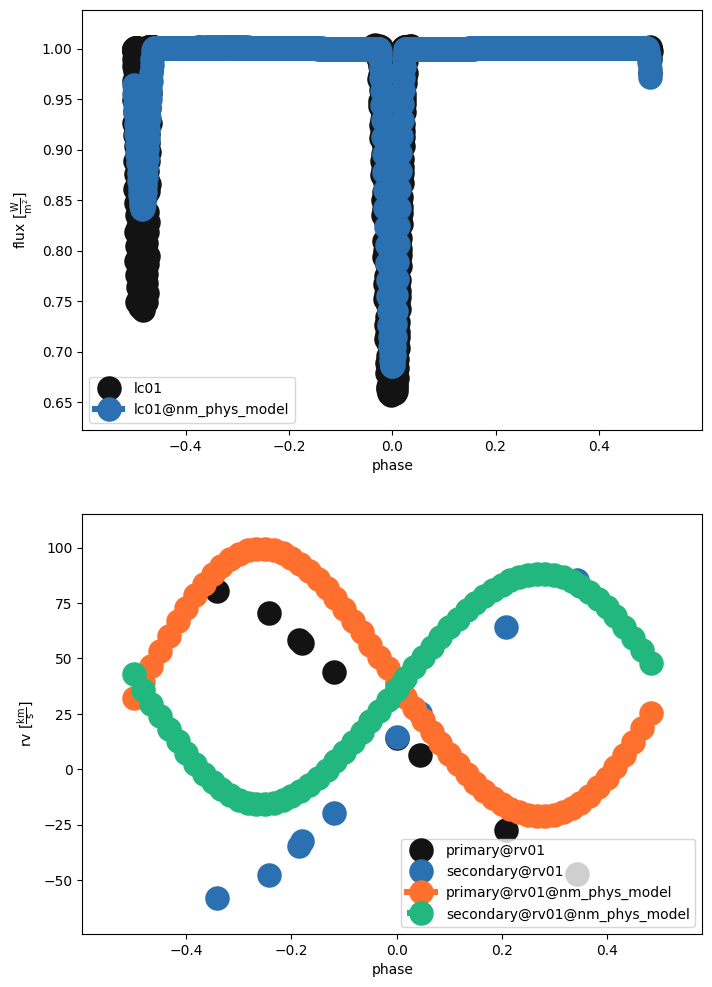

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [10]:
b.plot(model = 'nm_phys_model', x = 'phases', show = True, legend = True, marker = 'o')

In [11]:
b.save('during_nm_phys.bundle')

'during_nm_phys.bundle'